<a href="https://colab.research.google.com/github/soeun823/hon_gong_machine/blob/master/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 훈련세트와 테스트세트

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l,w]for l,w in zip(fish_length, fish_weight)] #샘플
fish_target = [1] *35 + [0]*14

In [4]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
print(fish_data[4])#인덱싱
print(fish_data[0:5])#슬라이싱

[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [9]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)
#테스트 세트에 빙어가 없어 빙어를 분류하면 0.0 이 뜬다.(샘플링 편향)
#결론 도미와 빙어를 잘 섞어 줘야한다.

0.0

**NUMPY**
: 배열 라이브러리

In [12]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)

In [14]:
print(input_arr.shape) #샘플 수, 특성 수

(49, 2)


In [18]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
print(index)
print(input_arr[[1,3]])

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]
[[ 26.3 290. ]
 [ 29.  363. ]]


In [25]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [26]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [30]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

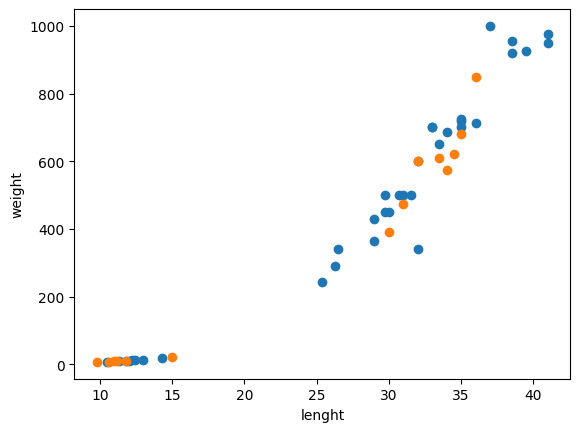

In [31]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()

**두번째 머신러닝 프로그램**

In [32]:
kn = kn.fit(train_input,train_target)
kn.score(test_input, test_target)

1.0

In [37]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [38]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

***리뷰***<br>
: 훈련데이터와 테스트 데이터가 같아서 알고리즘의 결과가 똑같아 올바른 훈련이 아니였다.
,데이터에 한생선만 넣어도 올바른 학습이 되지 않는다.(샘플링 편향)
,골고루 섞기 위해 NUMPY shffle() 함수를 사용했다.